# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2023-07-24_2024-04-15.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-14,2024-04-15,570.171778,670.487110,556.812927,661.451697,1.857144e+11,1.148259e+11
1,2024-04-13,2024-04-14,704.601712,712.014992,498.394984,572.976069,1.666582e+11,1.230839e+11
2,2024-04-12,2024-04-13,835.801622,870.721399,654.919501,710.703011,8.572999e+10,1.482425e+11
3,2024-04-11,2024-04-12,856.083116,894.914461,829.457920,833.627164,7.119291e+10,1.551272e+11
4,2024-04-10,2024-04-11,867.276535,877.307242,826.585311,859.108166,6.967570e+10,1.549334e+11


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-14,2024-04-15,570.171778,670.487110,556.812927,661.451697,1.857144e+11,1.148259e+11
1,2024-04-13,2024-04-14,704.601712,712.014992,498.394984,572.976069,1.666582e+11,1.230839e+11
2,2024-04-12,2024-04-13,835.801622,870.721399,654.919501,710.703011,8.572999e+10,1.482425e+11
3,2024-04-11,2024-04-12,856.083116,894.914461,829.457920,833.627164,7.119291e+10,1.551272e+11
4,2024-04-10,2024-04-11,867.276535,877.307242,826.585311,859.108166,6.967570e+10,1.549334e+11
...,...,...,...,...,...,...,...,...
261,2023-07-28,2023-07-29,269.972548,290.480844,268.198973,289.579376,6.089936e+10,2.960081e+10
262,2023-07-27,2023-07-28,291.640115,299.909712,272.394698,273.709270,9.607973e+10,3.011555e+10
263,2023-07-26,2023-07-27,297.900986,325.872970,286.336867,293.157265,1.920151e+11,3.206954e+10
264,2023-07-25,2023-07-26,282.457808,313.910123,249.345224,297.113063,1.761303e+11,2.930024e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,266,266,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02
mean,2023-12-03 12:00:00,2023-12-04 12:00:00,438.965872,467.683605,415.987486,440.631835,8.872370e+10,5.988738e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,131.405032,135.168023,126.876862,131.198110,1.138602e+10,1.716348e+10
25%,2023-09-28 06:00:00,2023-09-29 06:00:00,221.981373,234.048731,216.275099,221.293551,2.789746e+10,2.684751e+10
50%,2023-12-03 12:00:00,2023-12-04 12:00:00,307.050253,325.750722,296.493340,307.858736,4.742174e+10,3.657972e+10
75%,2024-02-07 18:00:00,2024-02-08 18:00:00,476.044028,504.320037,450.304539,478.717401,9.747768e+10,5.016529e+10
max,2024-04-14 00:00:00,2024-04-15 00:00:00,1519.002180,1533.694386,1226.215940,1507.605301,5.788875e+11,1.954777e+11
std,NaN,NaN,326.291112,349.974838,303.465262,326.274342,1.063919e+11,5.334255e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       266 non-null    datetime64[ns]
 1   End         266 non-null    datetime64[ns]
 2   Open        266 non-null    float64       
 3   High        266 non-null    float64       
 4   Low         266 non-null    float64       
 5   Close       266 non-null    float64       
 6   Volume      266 non-null    float64       
 7   Market Cap  266 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 16.8 KB


### EDA

c:\Users\Randell\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


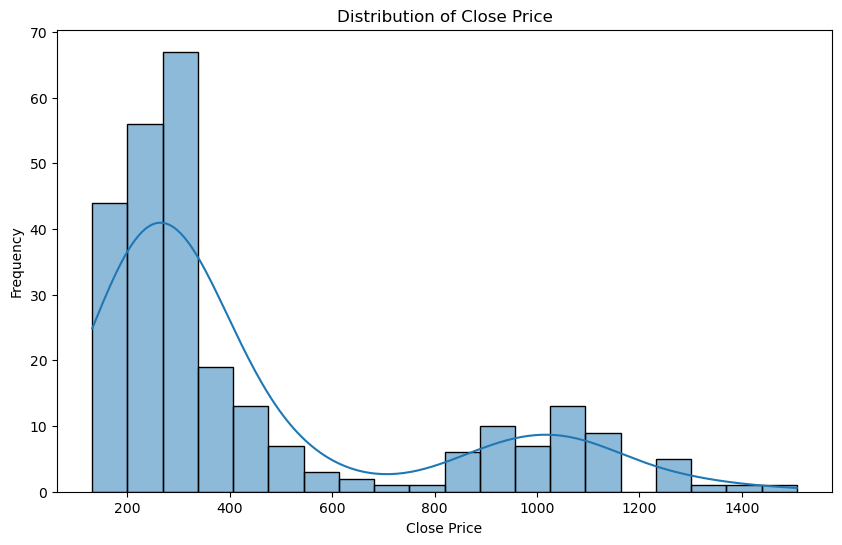

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

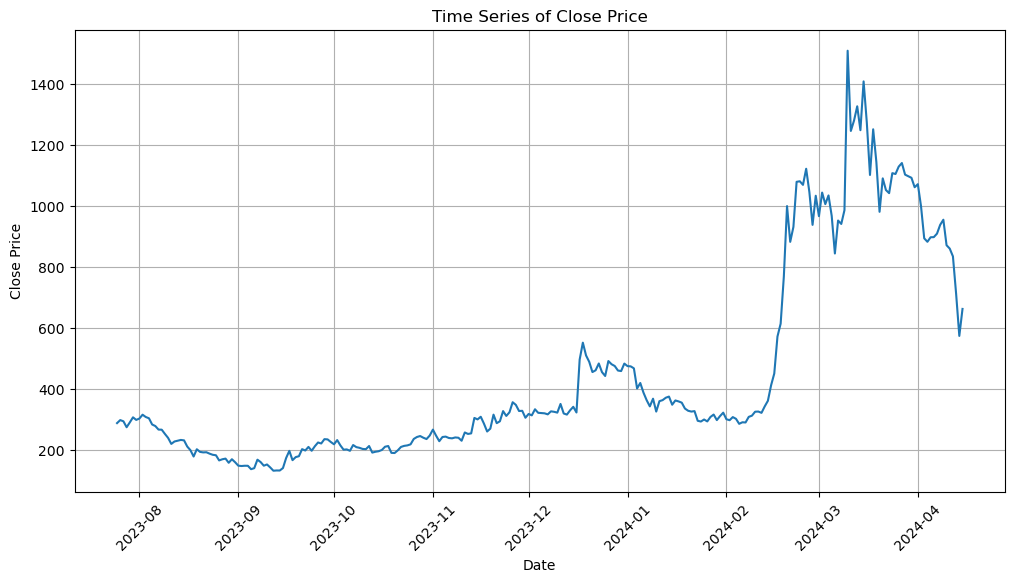

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 523.0008373971024


In [12]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 435.0495373651789
Gradient Boosting Mean Squared Error: 671.3929494893896
Support Vector Regressor Mean Squared Error: 115237.12577145566


### Testing the models

In [13]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [638.97477237]


In [ ]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1034.3342983]
